# El dataset de MNIST

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\tensorflow\pyth

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
len(mnist.train.images)

55000

In [4]:
len(mnist.test.images)

10000

In [5]:
im_temp = mnist.train.images[0]

In [6]:
from skimage import io
import numpy as np

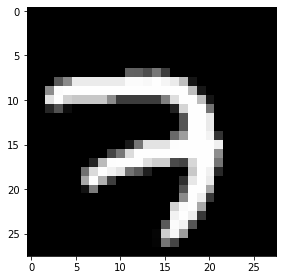

In [7]:
io.imshow(np.reshape(im_temp, (28, 28)))

In [8]:
mnist.train.labels[0] # corresponde al número 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Una red neuronal con TensorFlow - v1

* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 y 784 columnas.
* Cada dato del dataset es un número real entre 0 y 1.

y = softmax(W*x + b)

In [9]:
dim_input = 784
n_categories = 10

In [10]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [11]:
W = tf.Variable(tf.zeros([dim_input, n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
softmax_args = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(softmax_args)

## Entrenando la red neuronal

* Loss/Cost <- objetivo minimizar las pérdidas

In [13]:
from IPython.display import display, Math, Latex

In [14]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [15]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [16]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [17]:
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [19]:
session = tf.InteractiveSession()

In [20]:
tf.global_variables_initializer().run()

In [21]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(train_step, feed_dict={x:batch_x, y_:batch_y})

## Evaluando la red neuronal

In [22]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [23]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [24]:
print(session.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9222
